### 1. data road

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

### 2. data introduce
- show Iris data as DataFrame

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


- count by species

In [3]:
df["count"] = 1
df.groupby(["species"])["count"].count()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 3. data analysis

- link for each analysis  
[3.1 QDA](#3.1-QDA(quadratic-discriminant-analysis))  
[3.2 LDA](#3.2-LDA(linear-discriminant-analysis))  
[3.3 Naive Bayes analysis](#3.3-Naive-Bayes-analysis-(Gasussian-distribute))

#### 3.1 QDA(quadratic discriminant analysis)


- Allocate Iris data into IV(X) and DV(y)

In [4]:
X = iris.data
y = iris.target

- Produce classification model by QDA(quadratic discriminant analysis)

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

- show the ratio of some example(data num:1, 31, 61, 91, 121) to be each species

In [6]:
categories = {0: "setosa", 1: "versicolor", 2: "virginica",}

In [7]:
example_ratio = qda.predict_proba(X)[1:150:30]
example_predict = qda.predict(X)[1:150:30]
example_num = np.array(range(1,150,30))

In [8]:
example_result_ar = np.concatenate((example_num.reshape(5,1), example_ratio), axis=1)
example_result_ar = np.concatenate((example_result_ar, example_predict.reshape(5,1)), axis=1)

In [9]:
example_result = pd.DataFrame(example_result_ar, columns=("ex_num", "setosa", "versicolor", "virginica ", "prediction"))
example_result["prediction"] = example_result["prediction"].astype(int)
example_result["prediction"] = example_result["prediction"].apply(lambda data: categories[data])
example_result["ex_num"] = example_result["ex_num"].astype(int)
example_result


,ex_num,setosa,versicolor,virginica,prediction
0,1,1.000000e+00,7.655808e-19,1.311032e-34,setosa
1,31,1.000000e+00,2.933914e-21,3.406711e-38,setosa
2,61,4.759137e-71,9.985496e-01,1.450412e-03,versicolor
3,91,6.954550e-84,9.969702e-01,3.029796e-03,versicolor
4,121,2.886813e-121,2.502285e-05,9.999750e-01,virginica


- Test QDA model accuracy by Confusion Matrix

In [10]:
y_real = y
y_pred = qda.predict(X)

In [11]:
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



- show the ROC curve of QDA model

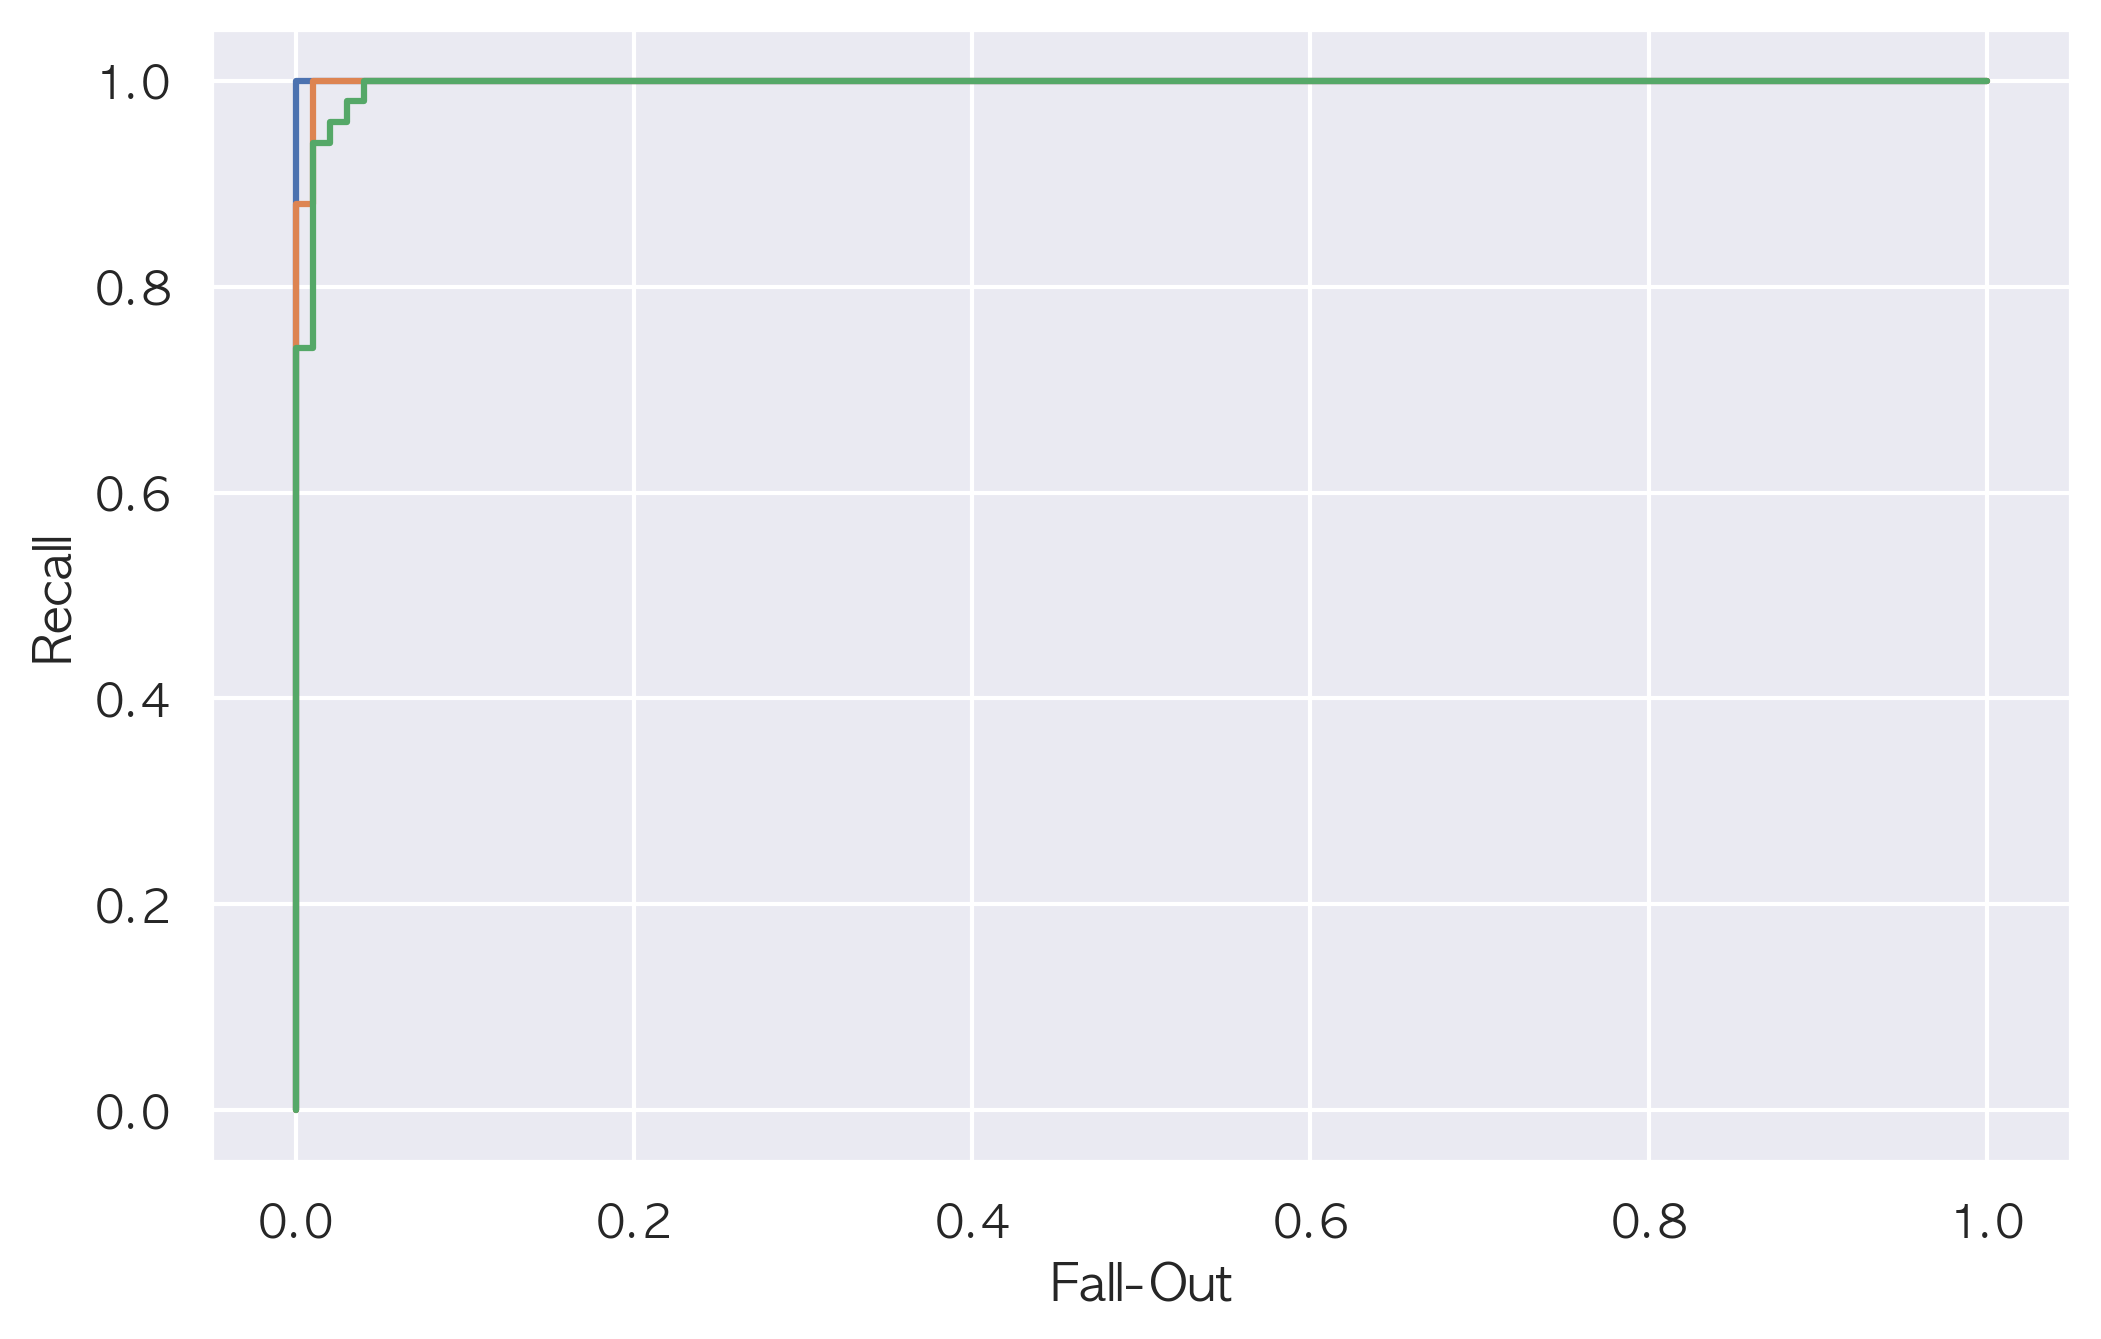

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
y = label_binarize(y, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], qda.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

#### 3.2 LDA(linear discriminant analysis)

- Allocate Iris data into IV(X) and DV(y)

In [13]:
X = iris.data
y = iris.target

- Produce classification model by LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

- show the ratio of some example(data num:1, 31, 61, 91, 121) to be each species

In [15]:
categories = {0: "setosa", 1: "versicolor", 2: "virginica",}

In [16]:
example_ratio = lda.predict_proba(X)[1:150:30]
example_predict = lda.predict(X)[1:150:30]
example_num = np.array(range(1,150,30))

In [17]:
example_result_ar = np.concatenate((example_num.reshape(5,1), example_ratio), axis=1)
example_result_ar = np.concatenate((example_result_ar, example_predict.reshape(5,1)), axis=1)

In [18]:
example_result = pd.DataFrame(example_result_ar, columns=("ex_num", "setosa", "versicolor", "virginica ", "prediction"))
example_result["prediction"] = example_result["prediction"].astype(int)
example_result["prediction"] = example_result["prediction"].apply(lambda data: categories[data])
example_result["ex_num"] = example_result["ex_num"].astype(int)
example_result


,ex_num,setosa,versicolor,virginica,prediction
0,1,1.000000e+00,7.217970e-18,5.042143e-37,setosa
1,31,1.000000e+00,1.975404e-19,2.788334e-38,setosa
2,61,5.968900e-20,9.992294e-01,7.705716e-04,versicolor
3,91,5.399006e-22,9.980934e-01,1.906591e-03,versicolor
4,121,3.038170e-37,8.272676e-04,9.991727e-01,virginica


- Test LDA model accuracy by Confusion Matrix

In [19]:
y_real = y
y_pred = lda.predict(X)

In [20]:
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



- show the ROC curve of QDA model

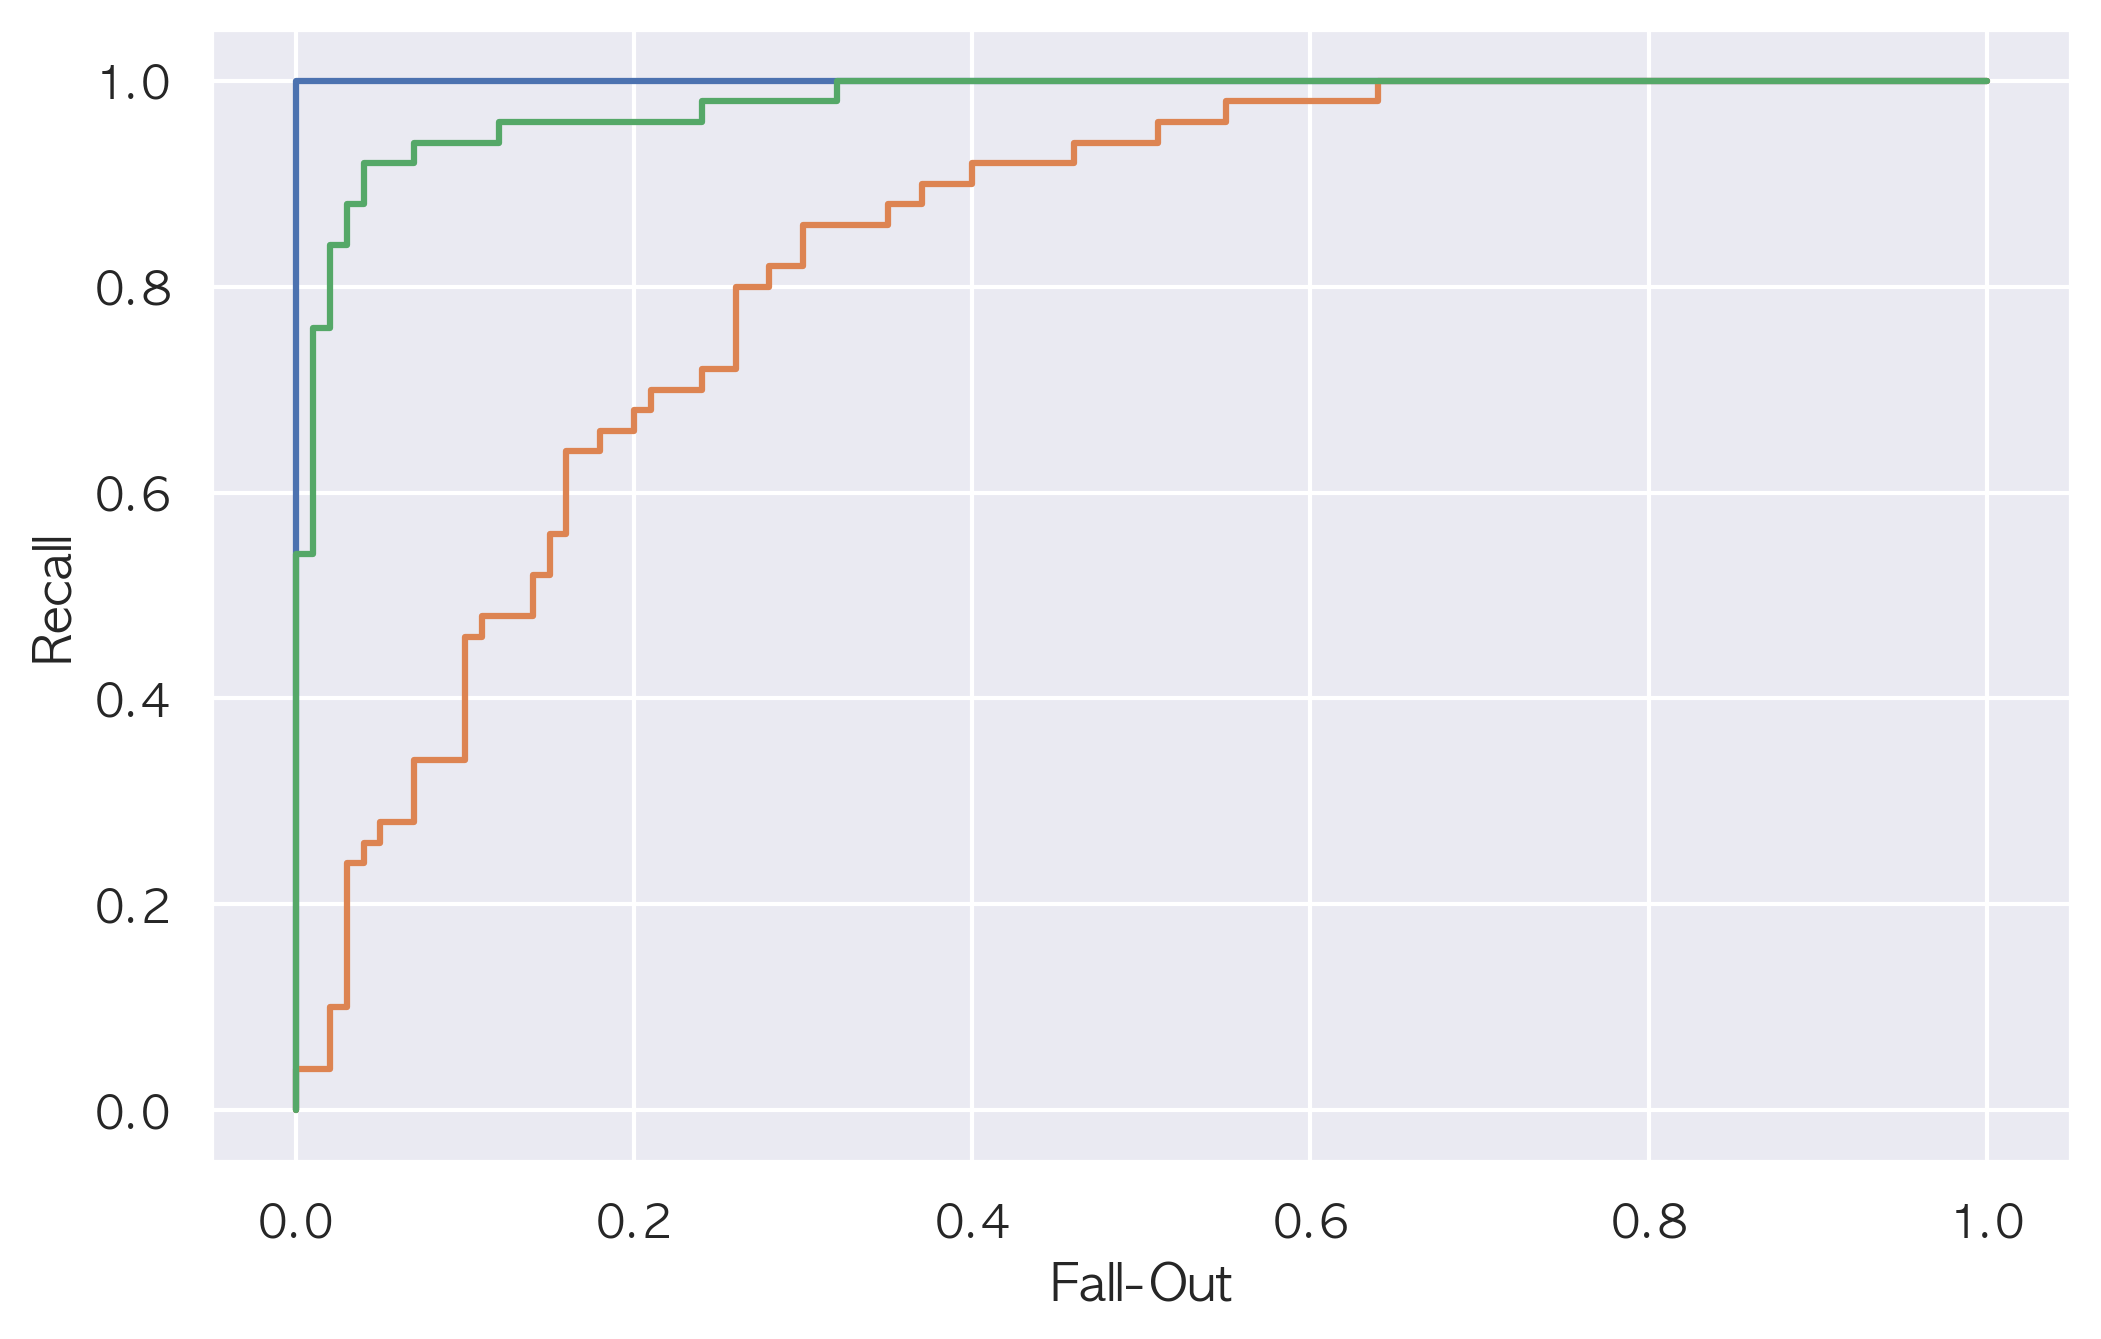

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
y = label_binarize(y, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], lda.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

#### 3.3 Naive Bayes analysis (Gasussian distribute)

- Allocate Iris data into IV(X) and DV(y)

In [22]:
X = iris.data
y = iris.target

- Produce classification model by Naive Bayes analysism(Gasussian distribute)

In [23]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

- prior probability

In [24]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

- parameter of setosa species

In [25]:
print("Normal distribution expectation for setosa speicies:", model_norm.theta_[0])

Normal distribution expectation for setosa speicies: [5.006 3.428 1.462 0.246]


In [26]:
print("Normal distribution Variance for setosa speicies :", model_norm.sigma_[0])

Normal distribution Variance for setosa speicies : [0.121764 0.140816 0.029556 0.010884]


- show the ratio of some example(data num:1, 31, 61, 91, 121) to be each species

In [27]:
y_real = y
y_pred = model_norm.predict(X)

In [28]:
example_ratio = model_norm.predict_proba(X)[1:150:30]
example_predict = model_norm.predict(X)[1:150:30]
example_num = np.array(range(1,150,30))

In [29]:
example_result_ar = np.concatenate((example_num.reshape(5,1), example_ratio), axis=1)
example_result_ar = np.concatenate((example_result_ar, example_predict.reshape(5,1)), axis=1)
example_result = pd.DataFrame(example_result_ar, columns=("ex_num", "setosa", "versicolor", "virginica ", "prediction"))
example_result["prediction"] = example_result["prediction"].astype(int)
example_result["prediction"] = example_result["prediction"].apply(lambda data: categories[data])
example_result["ex_num"] = example_result["ex_num"].astype(int)
example_result

,ex_num,setosa,versicolor,virginica,prediction
0,1,1.000000e+00,1.514808e-17,2.348201e-25,setosa
1,31,1.000000e+00,2.178203e-14,6.126727e-22,setosa
2,61,8.396018e-88,9.962383e-01,3.761714e-03,versicolor
3,91,5.508701e-101,9.893715e-01,1.062853e-02,versicolor
4,121,3.561375e-148,1.376260e-02,9.862374e-01,virginica


- Test Naive bayes model accuracy by Confusion Matrix

In [30]:
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



- show the ROC curve of Naive bayes model

In [31]:
model_norm.fit

<bound method GaussianNB.fit of GaussianNB(priors=None, var_smoothing=1e-09)>

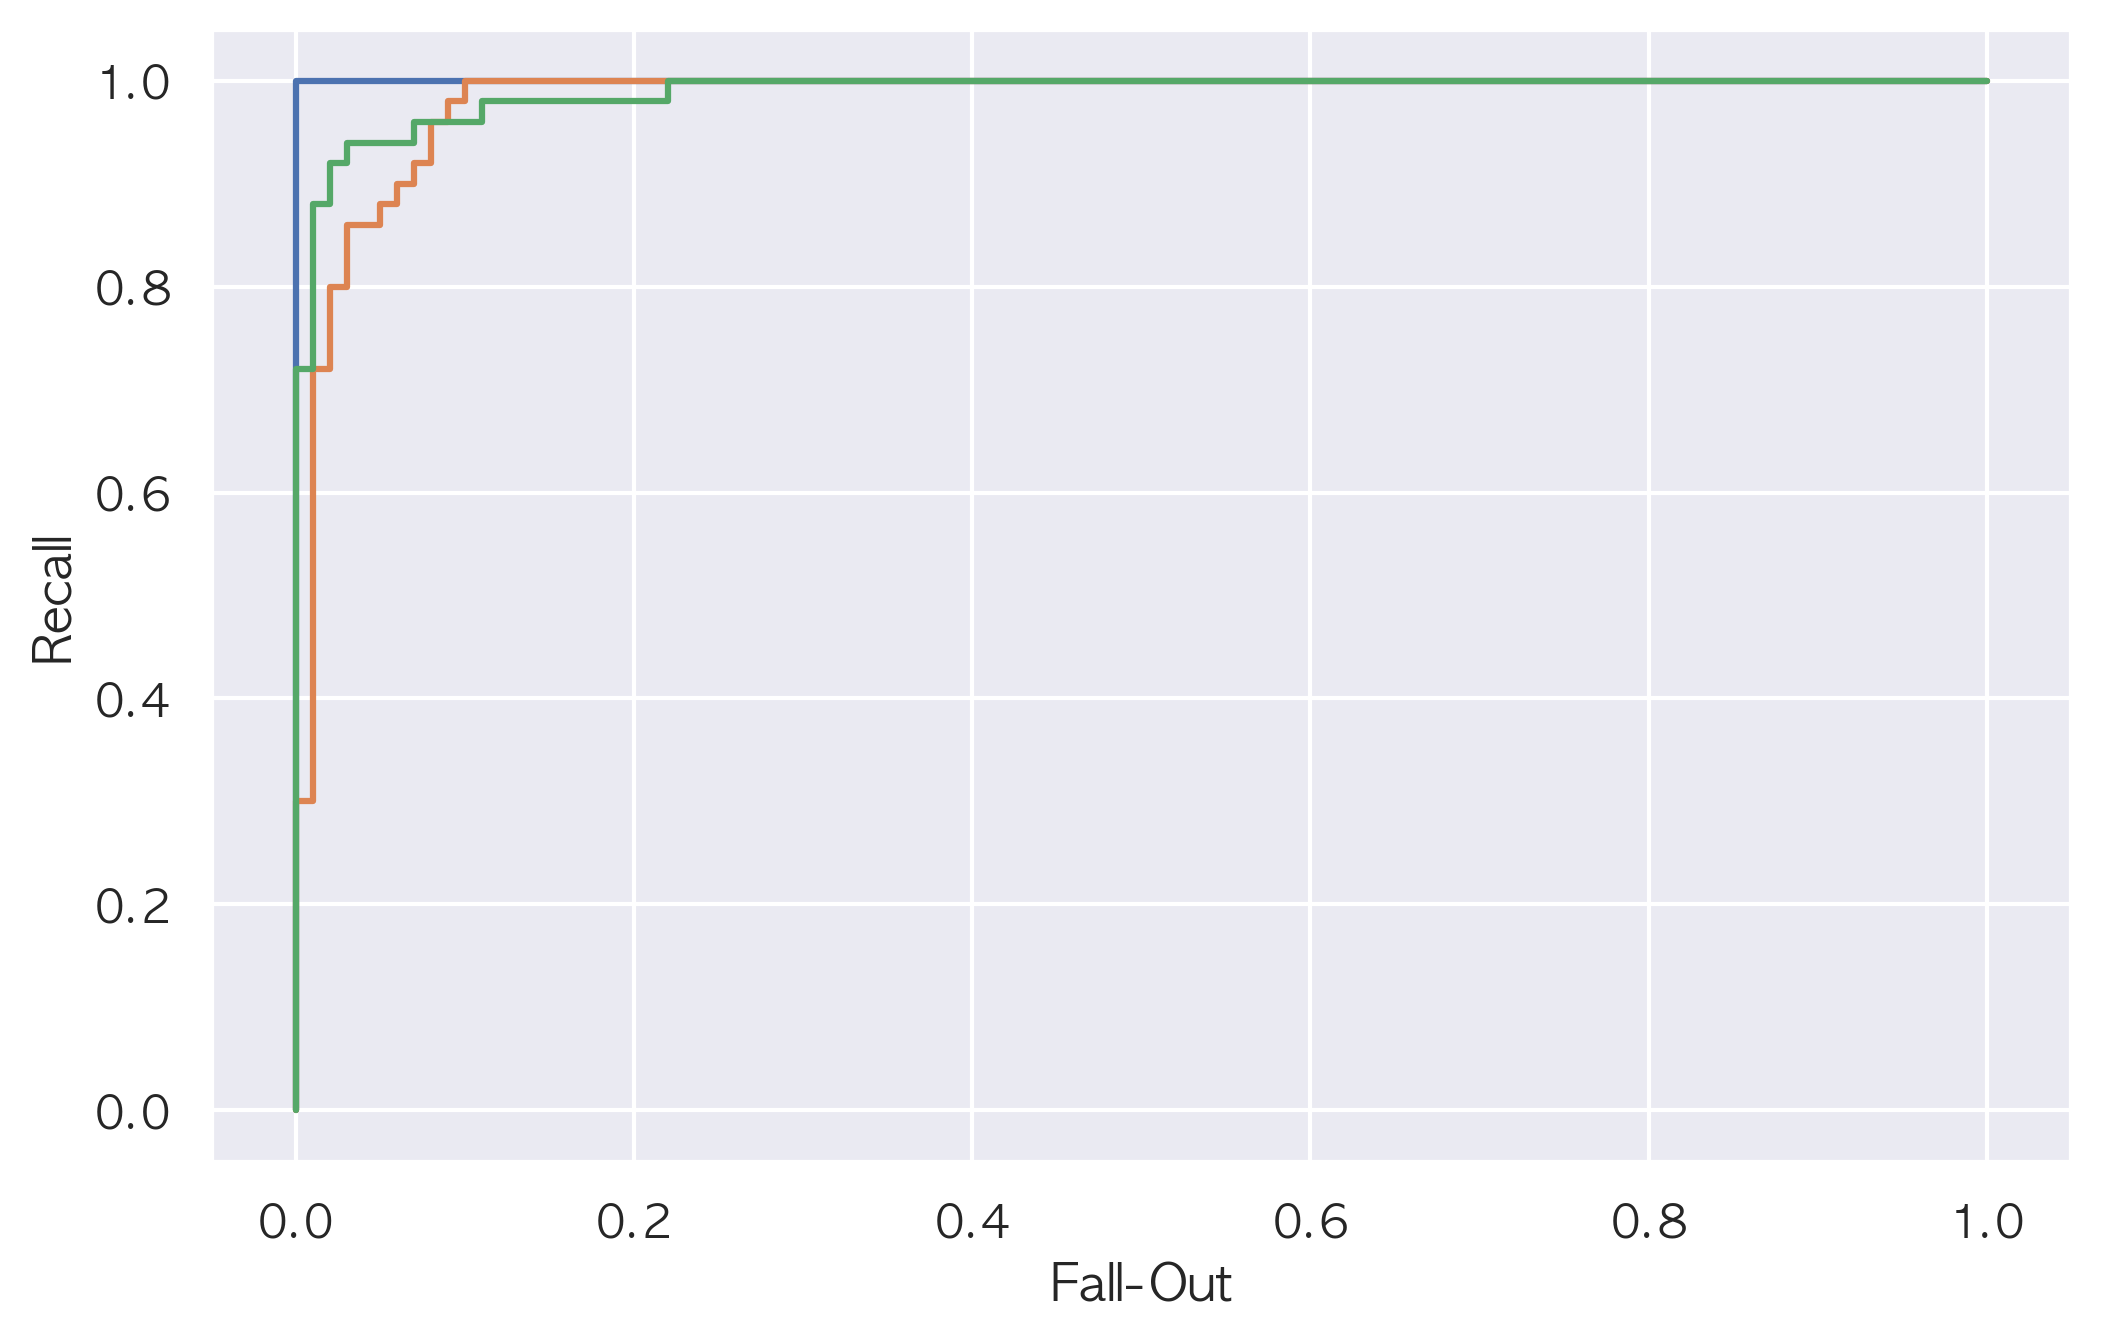

In [32]:
y = label_binarize(y, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model_norm = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model_norm.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

#### accuracies comaparison

|method|accuracy|
|---|---|
|QDA|0.98|
|LDA|0.98|
|NB|0.96|